# Sensitivity analysis

**Author** : Saman Hooshvar

Contact : saman.hooshvarfeyzabadi@mail.um.ac.ir

## Introduction


Sensitivity analysis is very important especially in the fields 
of electrical and electronics engineering due to the fact 
that circuits practically have tolerance.
In reality, there is no such 
thing as a “perfect” component, and each element in an 
electric circuit will always have tolerance values, specifically 
minimum and maximum values. For example, if we consider a 
simple $ 100Ω $ resistor, it will always have a tolerance value 
of, for example, five percent (5%). Thus, the minimum and 
maximum values of this passive electric component are $ 95Ω $ and 
$ 105 Ω $, respectively, without also considering temperature 
effects. Even the most precise electric components available in 
the market have their own tolerances. Thus, there is a need to 
understand the basics of sensitivity and its application to 
electric circuit analysis.

## WHAT IS SENSITIVITY ANALYSIS?

Sensitivity, generally, is the ability of an entity to be 
susceptible to stimulation. If we are talking about electric 
circuits, the sensitivity of that circuit is its ability to react with 
changes in certain parameters. It is a measure of how the 
system reacts to any stimulation, either internal or external. 
For example, sensitivity can be the measure of how a voltagedivider circuit composed of a constant dc voltage source and 
two resistors in series reacts in terms of the output voltage, 
with respect to perturbations in one resistor. When we say 
perturbation, we mean that the resistor changes from within its 
minimum and maximum levels. Sensitivity Analysis, on the 
other hand, is the study of the sensitivity in a system. If we are 
applying mathematical and scientific concepts in analyzing the 
variations in the output voltage of a voltage-divider circuit 
with perturbations in one resistor, then we can say that we are 
performing a sensitivity analysis on the circuit.

Generally, sensitivity can be described as the limiting ratio 
of the fractional change in a measured value to the fractional 
change in value of a certain parameter. Thus, if the change in 
a measured value is too small even if the change in a certain 
parameter is large, then we can say that the system is not 
sensitive or has a **low sensitivity**. On the other hand, if the 
change in a measured value is too large even if the change in a 
certain parameter is small, then we say that the system is too 
sensitive or has a **high sensitivity**. Sometimes, we want to 
have a system that has a *low sensitivity*, such as<u> electronic 
amplifiers</u> and <u>oscillators</u> in the electronic systems 
perspective, and <u>mechanical shock absorbers</u> in mechanical 
systems perspective. Furthermore, a *high sensitive* system is 
needed especially if we are dealing with <u>measurements</u> and 
<u>data acquisition</u>. Examples are sensors that require higher 
sensitivities such as <u>chemical sensors</u> and <u>vibration sensors</u>.

## Sensitivity Analysis in Circuits

Sensitivity Analysis measures how the variation in the output of a circuit can be attributed to different variations in its input parameters. This is crucial for understanding how robust a circuit design is against component tolerances.
or in other words , Sensitivity analysis in circuits refers to studying how variations in circuit parameters (like resistance, capacitance, etc.) affect the output (like current or voltage).

## Computing sensitivity in general:

The sensitivity S of a variable Y (like current I) with respect to a parameter X (like resistance R) can be defined as:

 $ S(_X^Y) = \frac{∂Y}{∂X}\frac{X}{Y} $

This formula gives a dimensionless measure of how sensitive Y is to changes in X.


## Determining sensitivity

To determine whether this voltage divider is sensitive or not, we can look at the size of these derivatives.

- If $ S(_X^Y)$ is large, then the Y element is considered sensitive with respect to the X element.
- Otherwise, if these values are small, it indicates that changes in X have little effect on the Y.


## Sensitivity in a resistive circuit

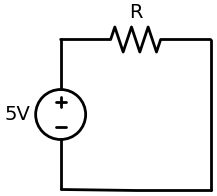

In [4]:
import schemdraw
from schemdraw import elements as elm

with schemdraw.Drawing():
    C = elm.Resistor().label('R')
    elm.Line().down()

    elm.Line().tox(C.start)

    elm.SourceV().label('5V').up()


## Sensitivity analysis in a voltage divider

For a simple resistive circuit, you can use Ohm's Law:


$ I = \frac{V}{R} $


To find the sensitivity of **current**(I) with respect to **resistance**(R):


$ S(_R^I) = \frac{∂I}{∂R} \frac{R}{I} $


Calculating the partial derivative:


$ \frac{∂I}{∂R} = -\frac{V}{R^2}$


So,


$ S(_R^I) = -\frac{V}{R^2} \frac{R}{I} = -\frac{V}{R} I $

Now to calculate it based on the elements in our resistive curcuit.
The source voltage is 10V and the value of R changes beetwen 0 to 100 in order to see the changes in the output current.

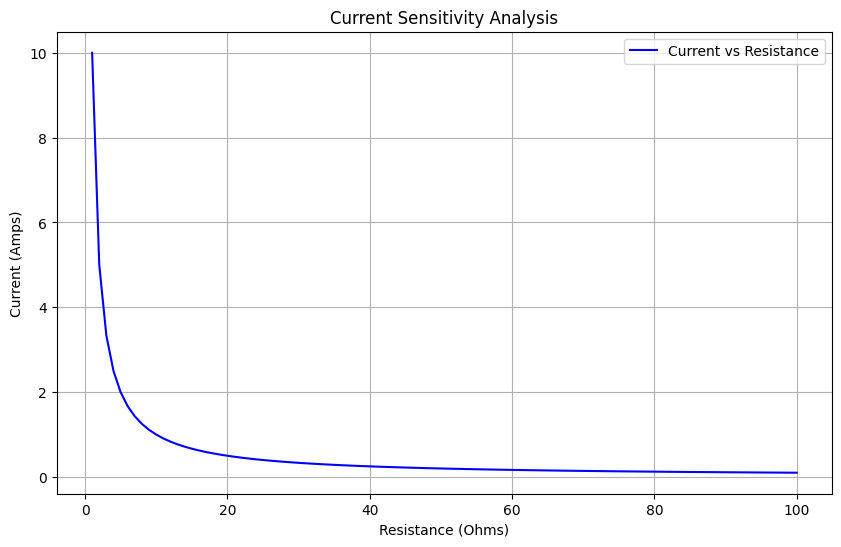

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import PySpice
from PySpice.Spice.Netlist import Circuit

V_source = 10 
R_values = np.linspace(1, 100, 100)  

I_values = []

for R in R_values:
    circuit = Circuit('Sensitivity Analysis')
    circuit.V(1, 'input', circuit.gnd, V_source)
    circuit.R(1, 'input', 'output', R)

    simulator = circuit.simulator(temperature=25, nominal_temperature=25)

    analysis = simulator.operating_point()

    I = V_source / R
    I_values.append(I) 

plt.figure(figsize=(10, 6))
plt.plot(R_values, I_values, label='Current vs Resistance', color='blue')
plt.title('Current Sensitivity Analysis')
plt.xlabel('Resistance (Ohms)')
plt.ylabel('Current (Amps)')
plt.grid()
plt.legend()
plt.show()


## Code explination

**1- Defining the resistances and voltage sources:**
-  A voltage source of 10 volts is defined.
-  An array of resistance values is created, ranging from 1 to 100 ohms.

**2- loop for each resistance(R):**
- A new circuit is created with a voltage source and a resistor.
- The current ($ I$) through the resistor is calculated using Ohm's Law: $ I = \frac{V}{R} \ $.
- The calculated current value is stored in I_values.

**3- Drawing Chrachteristic curve:**
- A plot is generated to visualize the relationship between resistance and current. 
- The **x-axis** represents resistance values, while the **y-axis** represents current values.

**4- Calculating sensitivity**

$ S(_I^R) = \frac{∂I}{∂R} \frac{R}{I} $
$ \frac{∂I}{∂R} = -\frac{V}{R^2}$

Substituting the values:

$ S = (-\frac{V}{R^2}) ·\frac{R}{V/R} = (-\frac{V}{R^2})·\frac{R^2}{V} = -1 $

The sensitivity S = -1 indicates that for a 1% increase in resistance, there will be a 1% decrease in current. 

**5- Conclusion:**
- Sensitivity Value: The absolute value of sensitivity is 1, which indicates a direct and proportional relationship between changes in resistance and changes in current.
- Circuit Sensitivity: Since a small change in R leads to a proportional change in I, we can conclude that the circuit is sensitive to variations in resistance.

this means that if you were to change the resistance by a small amount, you would observe a significant and predictable change in the current flowing through the circuit. Thus, **the circuit can be considered sensitive**.

## Sensitivity in a voltage divider
Consider a voltage divider circuit shown in the code below. The circuit 
is composed of a constant dc voltage source and two resistors 
in series. The output is the voltage across the 100-ohm 
resistor, while the input is a $ 5V $ dc voltage source. The 
value of the series resistance is 50 ohms with a tolerance of 
5%, while the 100-ohm resistor has a tolerance of 2%. Thus, if 
the 50-ohm resistor has a 5% tolerance, then its value can vary 
from 47.5 to 52.5 ohms. On other hand, if the 100-ohm 
resistor has a 2% tolerance, then its value can vary from 98 to 
102 ohms. 


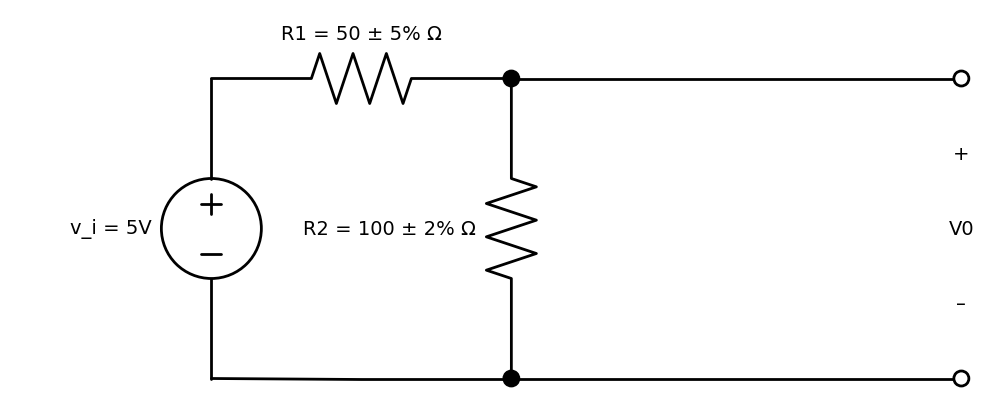

In [6]:
import schemdraw
from schemdraw import elements as elm

with schemdraw.Drawing() as d:
    d.config(inches_per_unit=1, unit=3)
    V = elm.SourceV().label('v_i = 5V')
    d += elm.Resistor().right().label('R1 = 50 ± 5% Ω', loc='top')
    D = elm.Resistor().down().label('R2 = 100 ± 2% Ω')
    d += elm.Line().to(V.start)
    elm.Line().right(d.unit*1.5).at(D.start).dot(open=True).idot()
    elm.Line().right(d.unit*1.5).at(D.end).dot(open=True).idot()
    G = elm.Gap().toy(D.start).label(['–', 'V0', '+'])

## What will happen to the output voltage if the resistances in the circuit change?
Or in other words, how accurate will the 
output voltage be with changes in resistor values? To answer 
these questions , we need to determine first the change of 
values in the resistors. Let the difference between the actual 
resistor value and its ideal value be the change in resistance 
value, i.e. $ΔR ≜ Rₐ - Rᵢ$ . Thus, we can have 
$ΔR₁ ≜ R₁ₐ - R₁ᵢ $ and $ ΔR₂ ≜ R₂ₐ - R₂ᵢ$ . If we 
assume that $ ∆R1$ and $∆R2$ are small enough compared to 
their ideal values. The taylor series expansion will help us find out the answer.

## the Taylor series expansion:

$ v_0(R_1 + ΔR_1 , R_2 + ΔR_2) = $

$ v_0(R_1,R_2) + \frac{∂v_0}{∂R_1}ΔR_1 + \frac{∂v_0}{∂R_2}ΔR_2 + \frac{1}{2} \frac{∂^2 v_0}{∂R_1^2} ΔR_1^2 + \frac{∂^2 v_0}{∂R_1∂R_2}ΔR_1ΔR_2 + \frac{1}{2} \frac{∂^2 v_0}{∂R_2^2} ΔR_2^2 + ... $

$ v_0(R_1 + ΔR_1 , R_2 + ΔR_2) $ 

can be approximated 
**by neglecting second- and higher-order terms**, thus having the 
expression.

$ ≈ v_0(R_1,R_2) + \frac{∂v_0}{∂R_1}ΔR_1 + \frac{∂v_0}{∂R_2}ΔR_2 .$

Consequently, the deviation of the output voltage from its 
nominal value is then

$ v_0(R_1 + ΔR_1 , R_2 + ΔR_2) - v_0(R_1 , R_2) ≈ \frac{∂v_0}{∂R_1}ΔR_1 + \frac{∂v_0}{∂R_2}ΔR_2$ 

Thus, if we consider the circuit given in the example, then 
substituting the values will result to

$ v_0(R_1 , R_2) = \frac{R_2}{R_1 + R_2}v_i = \frac{100}{50 + 100}$

$ = \frac{10}{3}V;$

$ \frac {∂v_0}{∂R_1} = -\frac {R_2}{(R-1 + R_2)^2} v_i = -\frac{100}{(50 + 100)^2}$

$ ≈ -0.0222 V/Ω$

$ \frac {∂v_0}{∂R_2} = -\frac {R_1}{(R-1 + R_2)^2} v_i = -\frac{100}{(50 + 100)^2}$

$ ≈ -0.0111 V/Ω $

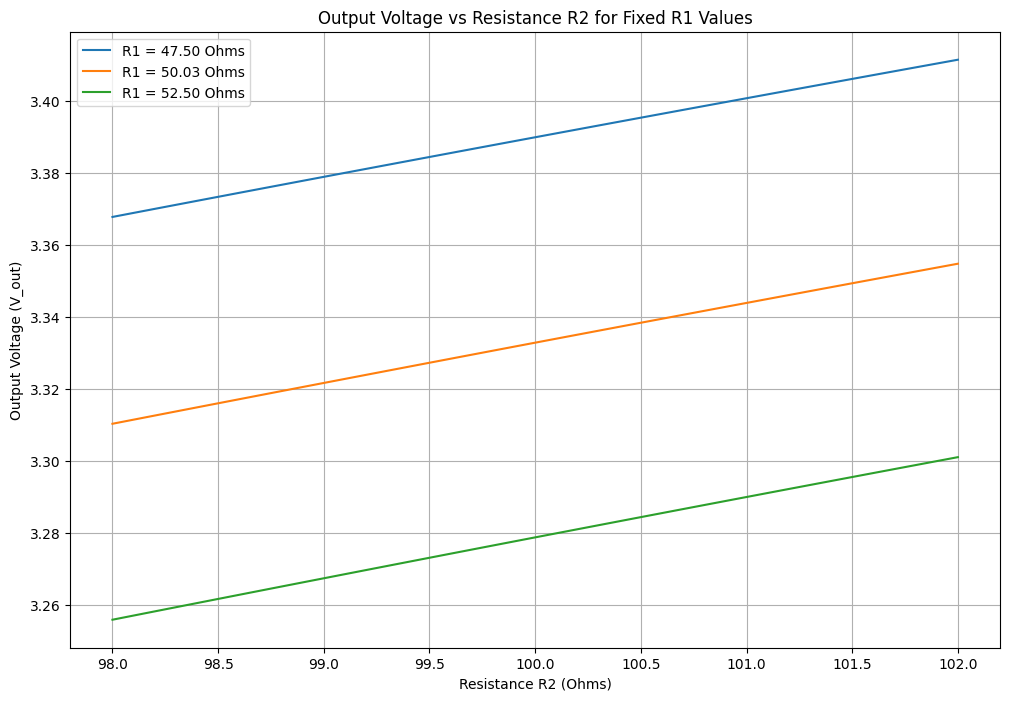

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import PySpice
from PySpice.Spice.Netlist import Circuit

# Sample simulate_circuit function for a voltage divider
def simulate_circuit(R1, R2, Vin=5.0):
    if R1 <= 0 or R2 <= 0:
        return np.nan  # Return NaN for non-positive resistances
    V_out = Vin * (R2 / (R1 + R2))
    return V_out

# Define ranges for R1 and R2
R1_values = np.linspace(47.5, 52.5, 100)  
R2_values = np.linspace(98, 102, 100) 

# Initialize the sensitivity matrix
sensitivity_matrix = np.zeros((len(R1_values), len(R2_values)))

# Calculate the sensitivity matrix
for i, R1_val in enumerate(R1_values):
    for j, R2_val in enumerate(R2_values):
        output_voltage = simulate_circuit(R1_val, R2_val)
        sensitivity_matrix[i, j] = output_voltage

# Plotting the results as line charts
plt.figure(figsize=(12, 8))

# Plot for fixed R1 values
fixed_R1_indices = [0, 50, 99]  # Select first, middle, last index for demonstration
for idx in fixed_R1_indices:
    plt.plot(R2_values, sensitivity_matrix[idx], label=f'R1 = {R1_values[idx]:.2f} Ohms')

plt.xlabel('Resistance R2 (Ohms)')
plt.ylabel('Output Voltage (V_out)')
plt.title('Output Voltage vs Resistance R2 for Fixed R1 Values')
plt.legend()
plt.grid()
plt.show()



## Code explination

**1- Simulating the circuit:**
- This function simulates a voltage divider circuit.
- It takes two resistances ($ R1 $ and $ R2 $) and an optional input voltage $ V_{in} $, defaulting to 5V.
- **If** either resistance is less than or equal to zero, it returns NaN.
- It calculates the output voltage ($ V_{out} $) using the voltage divider formula: 
  
  $V_{out} = V_{in} \frac{R2}{R1 + R2}\ $

**2- Definng Ranges:**
  - R1_values and R2_values are arrays created using np.linspace, which generates 100 evenly spaced values between specified ranges. This defines the range of resistances to analyze.

**4- Initializing Sensitivity Matrix:**
 - A matrix filled with zeros is created to store output voltages for each combination of R1 and R2.

**5- Calculating Sensitivity Matrix:**
 - Two nested loops iterate over all combinations of R1 and R2 values.
 - For each combination, it calls simulate_circuit function to compute the output voltage and stores it in the sensitivity_matrix.

**6- Plotting the results:**
- We create a new figure and use a loop to plot lines for selected fixed values of $ R1$ while varying $R2 $.
- **X-axis (Resistance $ R2$)**: This axis represents the varying resistance $ R2$ values, ranging from 98 to 102 ohms.
- **Y-axis (Output Voltage ($V_{out} $))**: This axis shows the calculated output voltage for each combination of $ R1$ and $ R2$.
- Lines: Each line is a fixed value of $ R1$ (47.5, 50.0, and 52.5 ohms). The lines show how the output voltage changes as $R $ varies.




## Sensitivity analysis in the voltage divider:

Sensitivity in this context refers to how responsive the output voltage is to changes in the resistances ($ R1$) and ($ R2$).

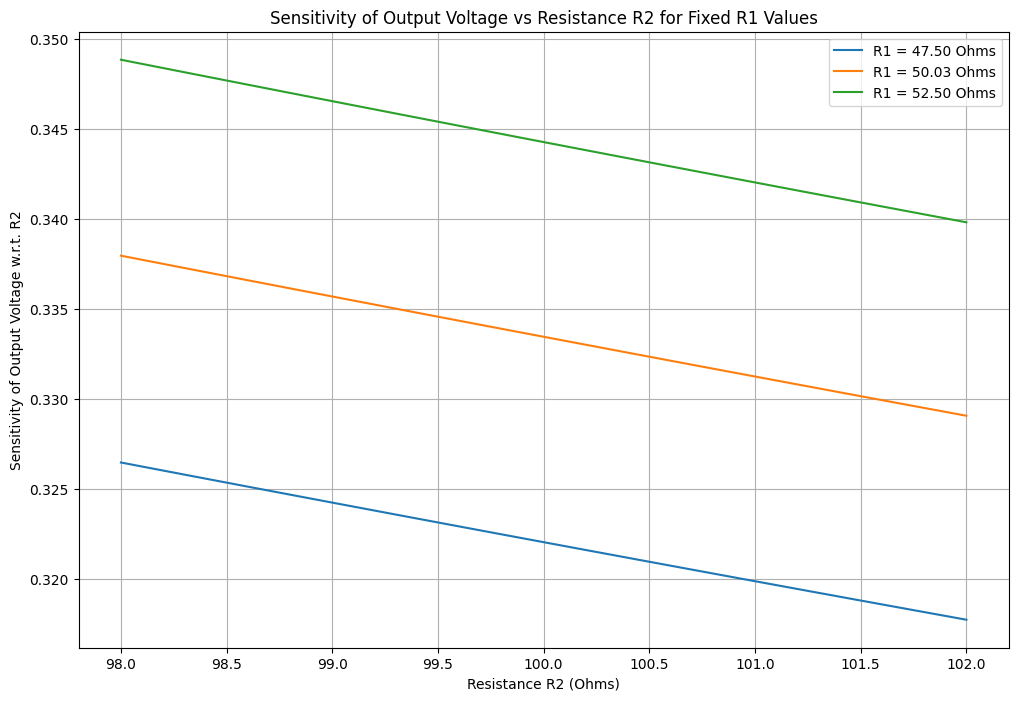

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import PySpice 

# Sample simulate_circuit function for a voltage divider
def simulate_circuit(R1, R2, Vin=5.0):
    if R1 <= 0 or R2 <= 0:
        return np.nan  # Return NaN for non-positive resistances
    V_out = Vin * (R2 / (R1 + R2))
    return V_out

# Define ranges for R1 and R2
R1_values = np.linspace(47.5, 52.5, 100)
R2_values = np.linspace(98, 102, 100)

# Initialize the sensitivity matrix
sensitivity_matrix = np.zeros((len(R1_values), len(R2_values)))

# Calculate the sensitivity matrix
Vin = 5.0
for i, R1_val in enumerate(R1_values):
    for j, R2_val in enumerate(R2_values):
        V_out = simulate_circuit(R1_val, R2_val)
        if not np.isnan(V_out):  # Check if V_out is valid
            dV_dR2 = Vin * (R1_val / (R1_val + R2_val)**2)
            sensitivity_matrix[i, j] = dV_dR2 * (R2_val / V_out)
        else:
            sensitivity_matrix[i, j] = np.nan  # Handle invalid output

# Plotting the sensitivity matrix
plt.figure(figsize=(12, 8))

# Plot for fixed R1 values
fixed_R1_indices = [0, 50, 99]  # Select first, middle, last index for demonstration
for idx in fixed_R1_indices:
    plt.plot(R2_values, sensitivity_matrix[idx], label=f'R1 = {R1_values[idx]:.2f} Ohms')

plt.xlabel('Resistance R2 (Ohms)')
plt.ylabel('Sensitivity of Output Voltage w.r.t. R2')
plt.title('Sensitivity of Output Voltage vs Resistance R2 for Fixed R1 Values')
plt.legend()
plt.grid()
plt.show()

## Code explination

**1- Voltage Divider Function:**
- This function computes the output voltage $ V_{out}$ of a voltage divider given resistances $ R1$ and $ R2$ and an input voltage $V_{in} $.
- If either resistance is non-positive, it returns NaN to indicate an invalid scenario.

**2- Define Resistance Ranges:**
- Here, we define ranges for resistances $ R1$ and $ R2$. $ R1$ varies between 47.5 ohms and 52.5 ohms, while $ R2$ varies between 98 ohms and 102 ohms.

**3- Initialize Sensitivity Matrix:**
- A matrix is created to store the sensitivity values for combinations of $R1 $ and $ R2$.

**4- Calculate Sensitivity:**
- The code iterates over each combination of $ R1$ and $R2 $.
- For each combination, it calculates the output voltage $ V_{out}$.
- If $ V_{out}$ is valid, it computes the partial derivative of $V_{out} $ with respect to $ R2$, denoted in code as dV_dR2:

     $ \frac{dV}{dR_2} = \frac{V_{in}  R1}{(R1 + R2)^2} $
    
- This derivative measures how much the output voltage changes with a small change in $ R2$.
- The sensitivity is then calculated as:
     
     $ S(_R^V) = \frac{V_{in}  R1}{(R1 + R2)^2} \frac{R_2}{V_{out}} $
     
- This formula shows how sensitive the output voltage is to changes in $ R2$.
**5- Plotting the Sensitivity Matrix:**
- This section creates a plot showing the sensitivity of the output voltage with respect to \\(R2\\) for selected fixed values of \\(R1\\).
- The **x-axis** represents the resistance $R2 $, while the **y-axis** represents the sensitivity.

**5- Conclusion:**

Given the nature of the voltage divider:
- The output voltage is quite sensitive to changes in both resistances, especially when $ R1$ and $R2 $ are close in value, as seen in the plot where small changes in $ R2$ lead to noticeable changes in $V_{out} $.
- **The sensitivity analysis** shows that increasing $R2 $ will increase $V_{out} $, while increasing $R1 $ will decrease it. The actual sensitivity will depend on specific values of $ R1$ and $R2 $.
this means that if precise control over output voltage is required, careful consideration must be given to variations in both resistances, indicating that this example can indeed be considered **sensitive**.


## Conclusion

In conclusion, this sensitivity analysis mini-project has provided valuable insights into the behavior of our system under varying conditions. By systematically examining the impact of changes in key parameters, It provides insights into how design choices regarding resistances can impact circuit performance, which is critical in applications where precision is necessary.critical factors were identified that significantly influence the output. Furthermore, we analayzed the sensitivity of a resistor circuit and a voltage divider as an example to realize the importance of sensitivity analysis. 

## Refrences:

https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://corporatefinanceinstitute.com/resources/financial-modeling/what-is-sensitivity-analysis/&ved=2ahUKEwiJ6bah14GJAxVj9LsIHRW_CTIQFnoECEAQAQ&usg=AOvVaw0gS-q97jG-1-Y8nURiUnZf

https://en.wikipedia.org/wiki/Sensitivity_analysis

ENGINEERING CIRCUIT ANALYSIS(William H. Hayt, Jr. (deceased))

Linear circuits(Reymond A. Decarlo)

https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.investopedia.com/terms/s/sensitivityanalysis.asp&ved=2ahUKEwin2dmn3oGJAxXpa_EDHe9IG9sQFnoECBcQAQ&usg=AOvVaw3-eFkCZ1ViTWwXP51hRM9r

https://www.ncbi.nlm.nih.gov/books/NBK209895/
